#### IMPORT SECTION

In [1]:
import pandas as pd
from   sklearn.datasets import load_breast_cancer

# 

#### LOAD DATASET BREAST CANCER

Nel seguente dataset è riportata un set di pazienti (donne) aventi o meno il cancro al  seno. Ogni paziente è cartterizzato da delle features (numero di elementi in ogni riga del campo 'data'), e da una classe associata nel campo target. 0 indica non affetta da tumore, 1 altrimenti.

In [2]:
breast_cancer   = load_breast_cancer()

In [3]:
features_matrix = breast_cancer.data
labels_vector   = breast_cancer.target

In [4]:
print("features matrix:\n", features_matrix)
print("\n\n labels vector:\n", labels_vector)

features matrix:
 [[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


 labels vector:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1

#

#### CREATE A PANDAS DATAFRAME

In [5]:
breast_df = pd.DataFrame(features_matrix)

# RINOMINIAMO LE FEATURES
breast_df.columns = list(breast_cancer.feature_names)

# INSERIAMO LA COLONNA FEATURES
breast_df["breast_cancer"] = labels_vector

# 

#### CLEANING

Tale procedura verifica se vi sono elementi NA, nel caso sia così li droppiamo.

In [6]:
breast_df.isna().sum()

# NEL CASO AVESSIMO AVUTO NA
breast_df.dropna(inplace=True)

#

#### NORMALIZZAZIONE

Molti modelli di machine learning convergono più velocemente se lavorano su dati aventi una scala relativamente simile o vicino alla distribuzione normale.

Sklearn offre diverse modalità per effettuare il ridimensionamento del dato.



<b>StandardScaler</b>: Centra i dati rimuovendo il valore medio da questi ultimi, e li ridimensiona dividendo la differenza per la deviazione standard.

<b>MinMaxscaler</b>: Permette di ricondurre i dati in un certo intervallo compreso tra due estremi. Pertanto sottrae al valore in esame il valore minimo nella sequenza, ed infine lo divide per la differenza (vmax - vmin).

<b>MaxAbsScaler</b>: Effettua una normalizzazione sul dato dividendo il valore (x) in questione con il valore massimo calcolato sul valore assoluto di ogni elemento della colonna considerata (cx). x/max(abs(cx))

<b>RobustScaler</b>: Se i dati contengono molti valori anomali (outliers), la normalizzazione sfruttando la media, deviazione standard, min e max non è detto funzioni. Questa tecnica rimuove la mediana e scala i dati in base all’intervallo quantile.

In [7]:
from Normalizator import Normalization

# StandardScaler
ss_norm = Normalization("ss", breast_df)
# MinMaxScaler
mm_norm = Normalization("mm", breast_df)
# MaxAbsScaler
ma_norm = Normalization("ma", breast_df)
# RobustScaler
rs_norm = Normalization("rs", breast_df, (0.1, 0.9))

# 

#### COVARIANZA

La <b>covarianza</b> misura la relazione lineare tra due variabili. Rappresenta la <b>tendenza delle due variabili</b> a variare insieme.

Può essere 
 - <b>positiva</b> indica che le due variabili tendono a crescere insieme
 - <b>negativa</b> indica che una variabile tende a diminuire quando l'altra aumenta
 - <b>vicina a zero indica una debole relazione lineare.

In [8]:
from Covarianzer import Covarianzer

ss_cov = Covarianzer(ss_norm.data)
mm_cov = Covarianzer(mm_norm.data)
ma_cov = Covarianzer(ma_norm.data)
rs_cov = Covarianzer(rs_norm.data)

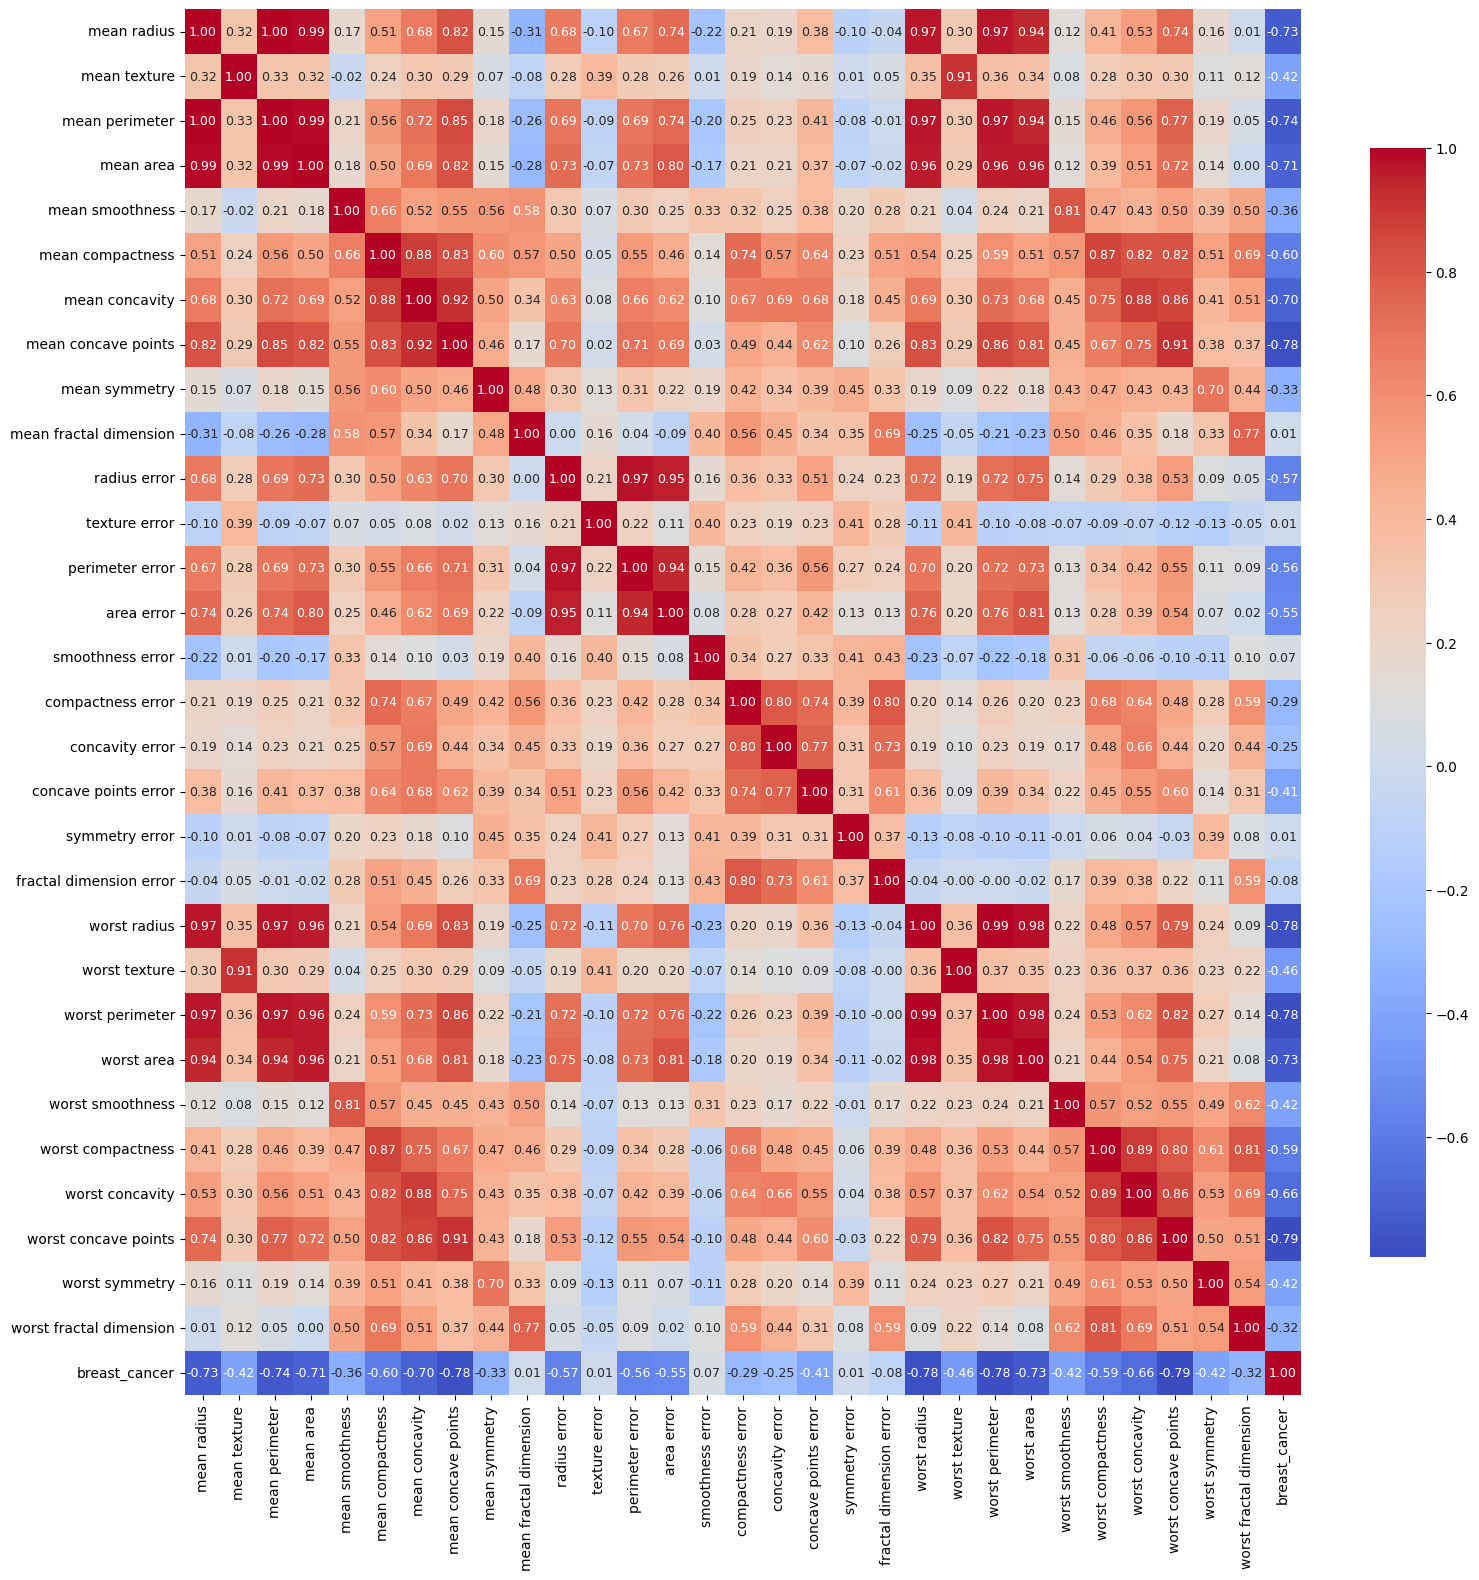

In [9]:
ss_cov.covariance_heatmap()

#

#### CORRELAZIONE

La <b>correlazione</b> è una misura normalizzata (Corr(X, Y) = Cov(X, Y) / (σX * σY)) che <b>quantifica</b> la <b>forza e la direzione</b> della relazione lineare tra due variabili. 

Ci sono diverse modalità per il calcolo della correlazione tra i dati: Pearson, Sperman e Kendall. 
La correlazione varia tra -1 e 1, dove 
  - -1 indica una correlazione negativa perfetta, 
  -  1 indica una correlazione positiva perfetta,
  -  0 indica assenza di correlazione.
  
<b>Pearson:</b> 
  - Tipo di correlazione: <b>Lineare</b>
  
  - La correlazione di Pearson valuta la <b>relazione lineare</b> tra due variabili continue. E' <b>sensibile</b> agli <b>outlier</b> e assume che le <b>variabili siano distribuite normalmente</b> e che la relazione tra di esse sia lineare.
  
<b>Sperman:</b>
  - Tipo di correlazione: <b>Monotona</b>
  - La correlazione di Spearman valuta la <b>relazione monotona</b> tra due variabili ordinate. Invece di considerare i valori effettivi delle variabili, <b>considera</b> il loro ordine (<b>rango</b>) nei <b>dati</b>.
  - La correlazione di Spearman è robusta agli outlier ed è utile quando le relazioni tra variabili non sono necessariamente lineari.
  
<b>Kendall:</b>
  - Tipo di correlazione: Monotona
  - La correlazione di Kendall valuta la relazione monotona tra due variabili ordinate. Come la correlazione di Spearman, la correlazione di Kendall è robusta agli outlier ed è particolarmente utile quando si tratta di dati ordinali (dati che possonoessere classificati in un ordine specifico) o quando non si vogliono fare ipotesi sulla distribuzione dei dati.

In [10]:
from Correlator import Correlator

# Calcoliamo le correlazioni soltanto per normalizzazione normale
ss_corr_per = Correlator(ss_norm.data, "pr")
ss_corr_spr = Correlator(ss_norm.data, "sp")
ss_corr_kdl = Correlator(ss_norm.data, "kd")

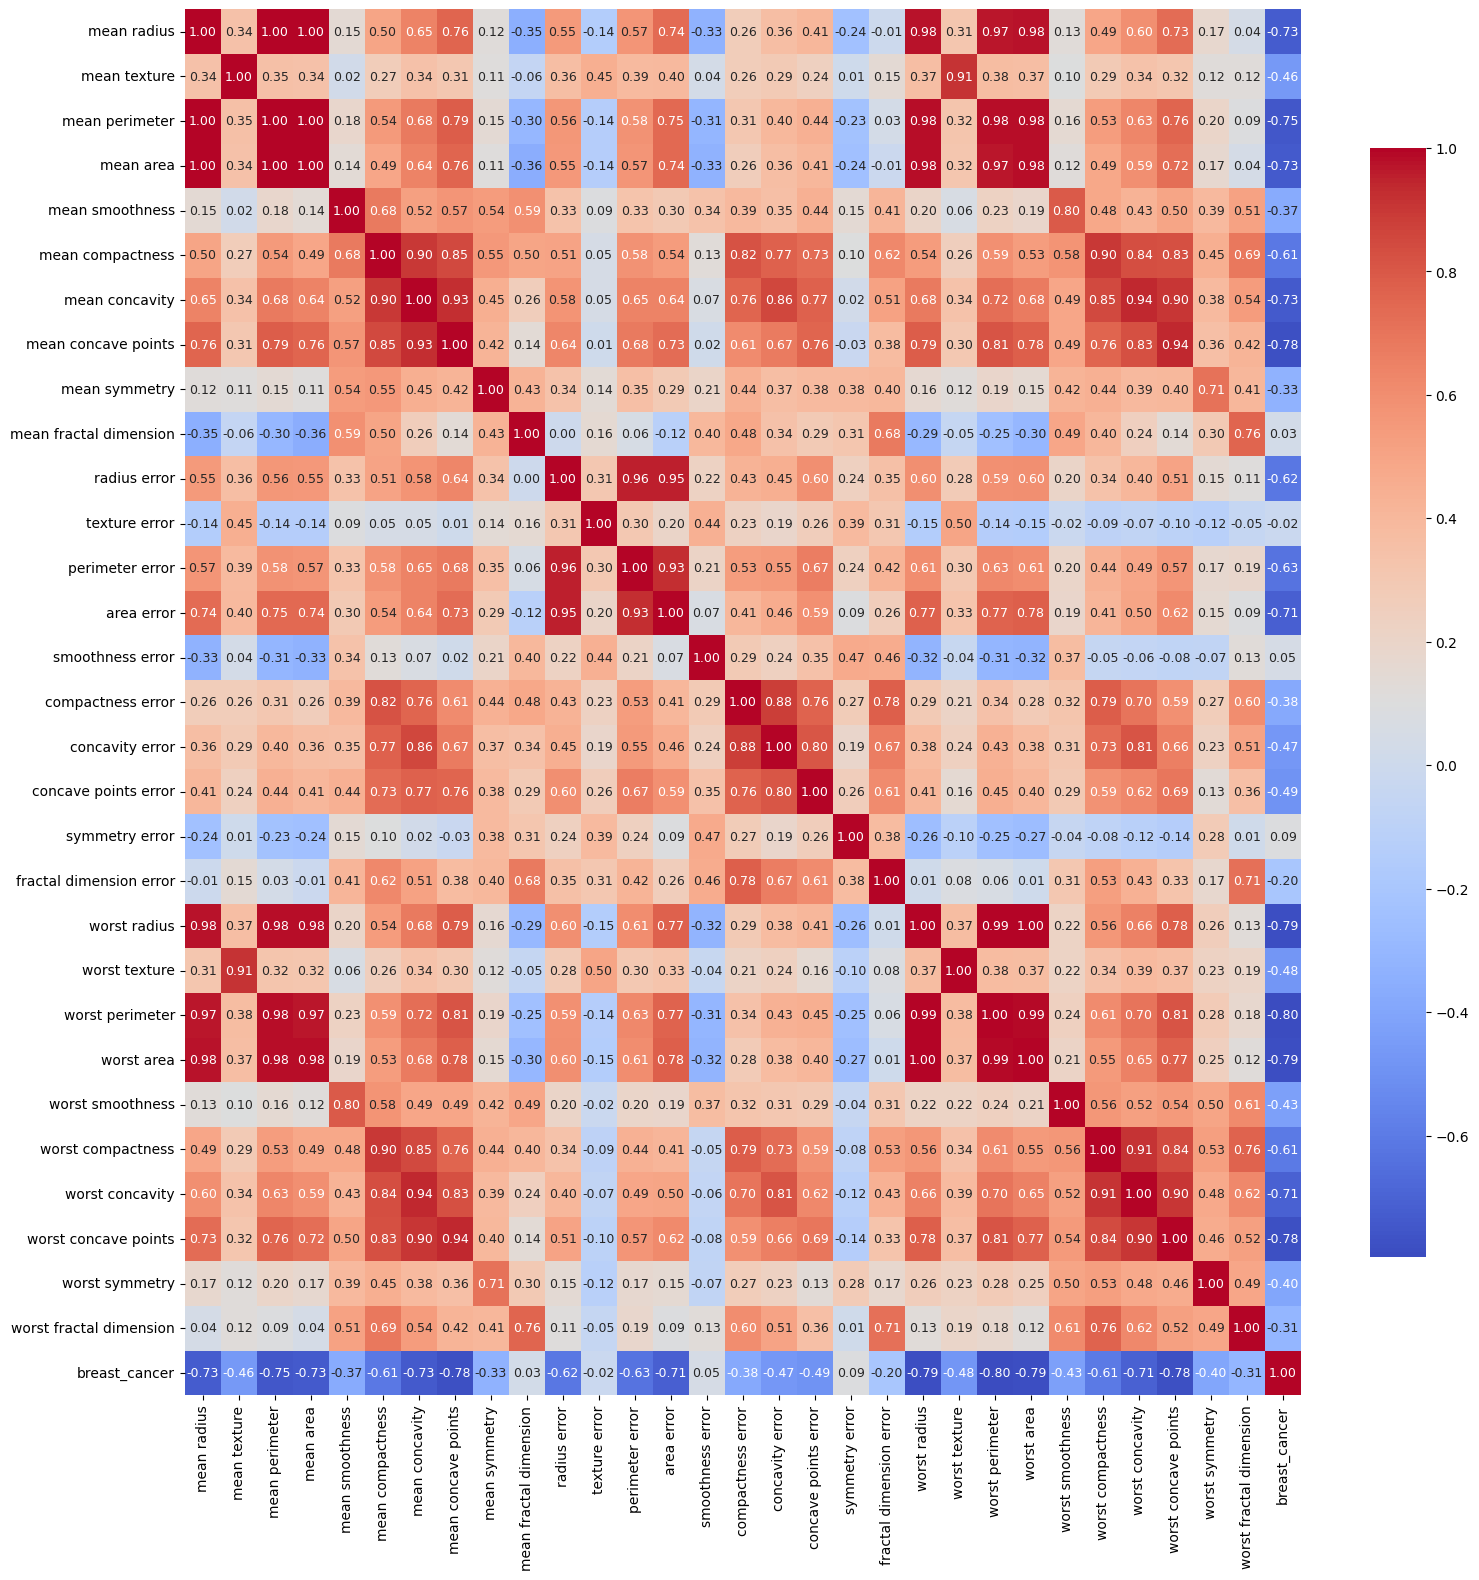

In [11]:
ss_corr_spr.correlation_heatmap()

# 

## Riduzione della dimensionalità

### PCA

<b>PCA</b> mira a <b>ridurre la complessità dei dati preservando al massimo le informazioni essenziali</b>. Lo fa <b>trasformando</b> un insieme di <b>variabili correlate</b> in un nuovo insieme di variabili <b>non correlate</b> chiamate <b>"componenti principali"</b>. Queste nuove variabili <b>catturano la massima variazione nei dati</b>, consentendo di esplorare e visualizzare le principali tendenze nei dati originali.


<figure><img src="Immagini/PCA.png" width="100" height="100"></figure>

Dove:
  
  - C è la matrice di covarianza
  - P matrice le cui colonne contengono gli autovettoridi di C (vettori ortonormali)
  - /\ matrice diagonale contenente gli autovalori di C
  
si tengono gli autovalori aventi valori molto grandi, quelli tendenti a zero vengono rimossi (con i relativi autovettori)

<br></br>

<figure><img src="Immagini/PCA_1.png" width="400" height="600"></figure>

In [12]:
from sklearn.decomposition import PCA
from Utilities             import scatter_generation


pca_breast = PCA(n_components=2)
principalComponents_breast = pca_breast.fit_transform(ss_norm.data.values)
principal_breast_Df = pd.DataFrame(
    principalComponents_breast, 
    columns = ['principal component 1', 'principal component 2']
)

In [13]:
principal_breast_Df

,principal component 1,principal component 2
0,9.225770,2.116196
1,2.655802,-3.784776
2,5.892492,-1.005579
3,7.135401,10.318716
4,4.129423,-1.905579
...,...,...
564,6.593983,-3.454947
565,4.024833,-3.556006
566,1.530077,-1.958871
567,10.405008,1.849078


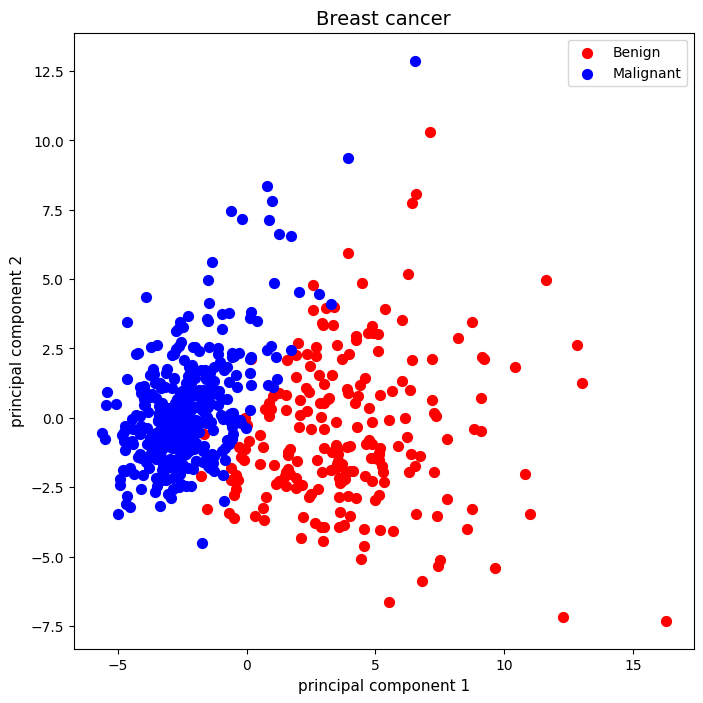

In [14]:
targets = ['Benign', 'Malignant']
colors  = ['red', 'blue']
columns_df = list(principal_breast_Df.columns)
scatter_generation("Breast cancer", targets, labels_vector, principal_breast_Df, columns_df, colors)

#

### SVD

La SVD ("Singular Value Decomposition") è una tecnica che scompone una matrice in tre altre matrici più semplici. La SVD è definita come segue:

A = UΣV^T

 - Σ è una matrice diagonale m x n con valori singolari non negativi disposti in ordine decrescente lungo la diagonale principale. I valori singolari sono solitamente denotati con σ1, σ2, ..., σr, dove r è il rango di A.
 
 - U è una matrice ortogonale m x m.
 
 - V^T è la trasposta della matrice ortogonale n x n V.
 
Per calcolare la SVD usimao TruncatedSVD per una riduzione della dimensionalità.

In [15]:
from sklearn.decomposition import TruncatedSVD
import numpy as np


svd     = TruncatedSVD(n_components=2)
U_svd   = svd.fit_transform(ss_norm.data.values)
S_svd   = svd.singular_values_
VT_svd  = svd.components_


svd_df  = pd.DataFrame(
    U_svd, 
    columns = ['component 1', 'component 2']
)

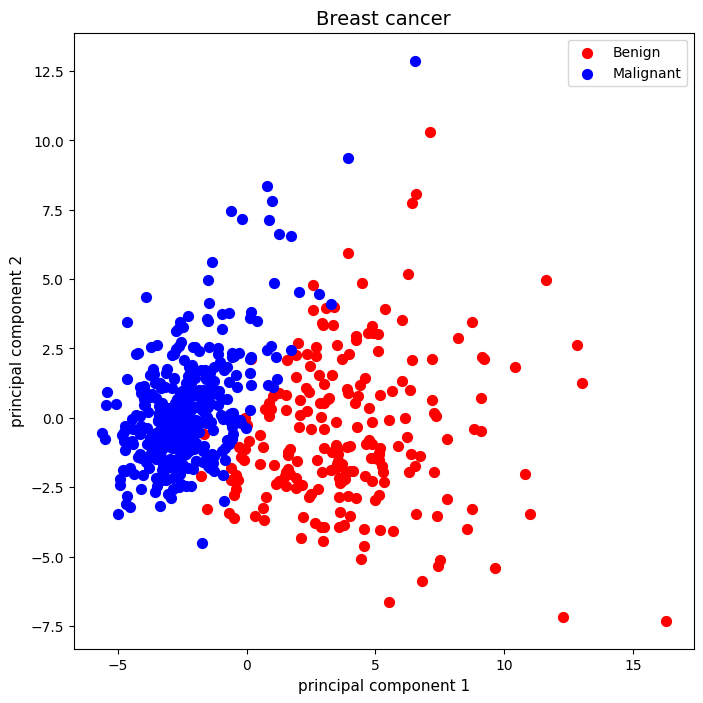

In [16]:
columns_df = list(svd_df.columns)
scatter_generation("Breast cancer", targets, labels_vector, svd_df, columns_df, colors)